# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

If you want to know how data has been saved in pickle file: see this [ipynb file](https://drive.google.com/file/d/1ZQUVBzgH7N2EbiyE3WTPx7JNe2eRTs36/view?usp=sharing)

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  

import pickle
training_data = pickle.load(open("training_data.pkl","rb"))
testing_data = pickle.load(open("testing_data.pkl","rb"))

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


## 1.2. Preprocess data



The data preprocessing techniqures I used includes transforming labels to numerical format (as required by nn training and loss function). Then I removed certain contents in the twitter data such as '#', any web links "http://....", stock market stickers such as "TSLA" And remove any punctuations and numbers. Furthermore, i replaced all contractions with proper separated words and convert everyhing to lower cases. Next, I applied lemmertization (to convert all words to its root form) and take out stop words (such as 'the' and 'a'). Finally, tokenization will be applied to each sentences so that we can have each word separated from each other. All the above steps is to ensure we have uniform format of words across the whole dataset and also get rid of anything that are not necessary such as stop words and punctuations. We then build a word_list dictionary and convert every words to indexes so that we can then pass the indexes for word embedding layer. After all, we will make each sentences equal length by adding padding or cutting off extra length.


In [2]:
#split data into input and label
import re

training_data1=[]
training_label1 = []
for x,y in training_data:
    training_data1.append(y)
    training_label1.append(x)

testing_data1=[]
testing_label1=[]
for x,y in testing_data:
    testing_data1.append(y)
    testing_label1.append(x)
    

In [3]:
#convert label into numerical format
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(training_label1)

lEnc = LabelEncoder()

label_train_encoded = lEnc.fit_transform(training_label1)
label_test_encoded = lEnc.transform(testing_label1)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))
len(label_train_encoded)

['neg' 'pos']
[0 1]


8000

In [4]:
#further cleaning
training_new = training_data1
testing_new = testing_data1

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x

def clean_str(string):


    string = re.sub(r'\$\w*', '', string)
    # remove old style retweet text "RT"
    string = re.sub(r'^RT[\s]+', '', string)
    # remove hyperlinks
    string = re.sub(r'https?:\/\/.*[\r\n]*', '', string)

    # remove hashtags
    # only removing the hash # sign from the word
    string = re.sub(r'#', '', string)

    string = remove_punctuation(string)
    #remove punch

    string = re.sub("\d+", "", string) #remove numbers

    string = re.sub("@[A-Za-z0-9]+","",string) #remove @ and its following contents
    string = re.sub("@[_A-Za-z0-9]+","",string)


    return string.strip().lower()
    
training_new = [clean_str(x) for x in training_new]
testing_new = [clean_str(x) for x in testing_new]

In [5]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [6]:
#this is for word contraction & tokenizing, apply lemmatization and take out stopword
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
tknzr = TweetTokenizer()
from nltk.corpus import stopwords as sw
stop_words = sw.words()

def pre_process(sent):
    y=[]
    yy=[]
    yyy=[]
    for x in tknzr.tokenize(sent):
      try:
        y+=(tknzr.tokenize(contraction_dict[x]))
      except:
        y.append(x)
    for a in y:
        yy.append((lemmatizer.lemmatize(a)).lower())
    for b in yy:
        if b not in stop_words:
            yyy.append(b)
        
    return yyy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
#apply above pre-processing step to training and testing
new_training=[]
new_testing=[]
for x in training_new:
  new_training.append(pre_process(x))

for x in testing_new:
  new_testing.append(pre_process(x))

print(new_training)
print(new_testing)

[['hopeless', 'tmr'], ['everything', 'kid', 'section', 'ikea', 'cute', 'shame', 'nearly', 'month'], ['hegelbon', 'heart', 'sliding', 'waste', 'basket'], ['ketchburning', 'hate', 'japanese', 'call', 'ban'], ['dang', 'starting', 'next', 'week', 'work'], ['oh', 'god', 'baby'], ['rileymcdonough', 'make', 'smile'], ['fggstar', 'stuartthull', 'work', 'neighbour', 'motor', 'asked', 'said', 'hate', 'update', 'search'], ['whytahuodyy', 'sialan'], ['athabasca', 'glacier', 'wa', 'athabasca', 'glacier', 'jasper', 'jaspernationalpark', 'alberta', 'explorealberta'], ['really', 'good', 'mampg', 'idea', 'never', 'going', 'meet'], ['rampageinthebox', 'mare', 'ivan'], ['sophiamascardo', 'happy', 'trip', 'keep', 'safe', 'see', 'soon'], ['tired', 'hahahah'], ['grumpycockney', 'knee', 'replacement', 'get', 'amp', 'day', 'ouch'], ['relate', 'sweet', 'sour', 'kind', 'bipolar', 'people', 'life', 'cuz', 'life', 'full'], ['aysegulk', 'pleasse'], ['sexykalamo', 'sure', 'tho'], ['feel', 'stupid', 'cant', 'seem', 

sentence with max length: 43
sentence with avg length: 6.1034


Text(0.5, 1.0, 'Sentence Length')

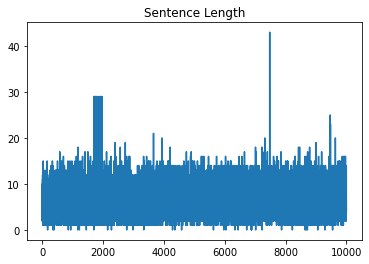

In [8]:
length_dis = []
for x in new_training:
  length_dis.append(len(x))
for x in new_testing:
  length_dis.append(len(x))

from matplotlib import pyplot as plt

plt.plot(length_dis)
print('sentence with max length: {}'.format(max(length_dis)))
print('sentence with avg length: {}'.format(sum(length_dis)/len(length_dis)))
plt.title("Sentence Length")
# The below graph shows that majority of the sentence length is around 20 and longest sentense is 43

In [9]:
#add in 'padding' and 'unknown' token
word_set=set()
for x in new_training:
  for y in x:
    word_set.add(y)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

In [10]:
####create a word dictionary
word_list=list(word_set)
word_list.sort()
word_index={}
i = 0
for x in word_list:
  word_index[x] = i
  i+=1
print(word_list)
print(word_index)

['[PAD]', '[UNKNOWN]', 'aa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaah', 'aaaaaand', 'aaaaages', 'aaaaahhhhhhhh', 'aaaahh', 'aaaahhh', 'aaahhh', 'aah', 'aahhhh', 'aahliyahr', 'aaj', 'aaliyuhx', 'aameen', 'aandreup', 'aangelayap', 'aapke', 'aaron', 'aaronbethunee', 'aaroncarpenter', 'aaronsegaert', 'aarwwi', 'aavak', 'aayegi', 'aayt', 'aazem', 'ab', 'abandoned', 'abandoning', 'abbeytaylor', 'abby', 'abbycan', 'abbyfoy', 'abbyleemiller', 'abbymill', 'abc', 'abcderza', 'abcdiagnosis', 'abchapman', 'abcwtvd', 'abeezygmt', 'abejzno', 'abes', 'abhi', 'abhicever', 'abi', 'abigailjacinthe', 'abirkhusro', 'abit', 'able', 'abligaverins', 'ablokeseyeview', 'abnerdacon', 'abnormalana', 'aboard', 'aboelhassan', 'abouty', 'abrianaaaa', 'abroad', 'abrupt', 'abrwnigrl', 'abscess', 'absent', 'absolute', 'absolutely', 'absoluteradio', 'abstinence', 'abt', 'abu', 'abusive', 'abuti', 'abzugame', 'ac', 'acadcularts', 'academic', 'acads', 'acasorguk', 'acbmsecem', 'acburgar', 'acc', 'accent', 'accept',

In [11]:
#### make the word length the same for each sample by adding padding or cutting off extra length
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = list()
    for x in sentences:
      y=[]
      for word in x:
         try:
           y.append(word_index[word])
         except:
           y.append(word_index['[UNKNOWN]'])

      #y = [word_index[word] for word in x]
      if len(y) < seq_length:
        y+=([word_index['[PAD]']]* (seq_length - len(y)))
      sent_encoded.append(y[:seq_length])

    return sent_encoded

sent_encoded = encode_and_add_padding(new_training, 20, word_index)
test_encoded = encode_and_add_padding(new_testing, 20, word_index)
print(sent_encoded)
print(test_encoded)

[[5723, 13286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4075, 7026, 11434, 5975, 2934, 11601, 8985, 8604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5519, 5493, 11926, 14147, 1121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6982, 5432, 6458, 1936, 1059, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3016, 12303, 9070, 14208, 14454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9417, 5017, 984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [10918, 7966, 11965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4368, 12447, 14454, 9011, 8657, 799, 11196, 5432, 13779, 11419, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [14318, 11763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [836, 4975, 14071, 836, 4975, 6476, 6477, 321, 4142, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [10655, 5052, 8001, 5934, 9050, 5030, 8266, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [10562, 8058, 6341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [12114, 5386, 13489, 6942, 11190, 11438, 12099, 0, 0, 

# 2 - Model Implementation

## 2.1. Word Embeddings

*You are required to describe which model was implemented (i.e. Word2Vec with CBOW, FastText with SkipGram, etc.) with justification of your decision *:

Here we use FastText from gensim becuase for FastText each word is made of a number of n-gram character units. Therefore when dealing with some OOV words it can have better performance than Word2Vec that can not process those OOV words becuase it treats each word as an atomic entity. Furthermore, i used SkipGram instead of CBOW simply because Skipgram is evaluated to have a better performance (please see charts in section 3.1): skip-gram has ~70% in syntactic accuracy, ~10% in Semantic accuracy and ~60% total accuracy vs CBOW of ~ 60% in syntactic accuracy, ~5% in Semantic accuracy and ~50% total accuracy based on the same training dataset

### 2.1.1. Data Preprocessing for Word Embeddings

*You are required to describe which preprocessing techniques were used with justification of your decision.*:

There are two parts of training dataset for word embedding. First part is our training and testing data after prepocessing using the preprocessing techiniques described in section 1. Second part is Ted dataset. And the preprocessing steps for this including take out punctuation and numbers, remove sound labels and convert everything to lower case; tokenize each sentences from corpus and then tokenize words in each sentence. However, we dont need to convert word to index or worry about padding or uniform sentence length for word embedding training. In addition, the reason for including the extra Ted dataset is to have a much larger training dataset which will give us an improved word embedding performance.

In [12]:
#download Ted dataset and pre_processing it for word embedding
#refer to lab2 code
import pprint

# For parsing our XML data
from lxml import etree 

# For data processing

from nltk.tokenize import word_tokenize, sent_tokenize

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install -U -q PyDrive

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')  
#also add ted dataset for our word embedding training
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(len(sentences)) 

273424


In [13]:
###create the training dataset for word embedding
total_data = new_testing+new_training + sentences
len(total_data)

283424

### 2.1.2. Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

"Please refer to the graph under evaluation section 3.1 which shows Skip-gram with dimension size of 200 and window size of 6 returns the optimal result in terms of overall total accuracy, sythtactic accuracy and samantic accuracy 

In [14]:
# Please comment your code
from gensim.models import FastText


# New section

### 2.1.3. Train Word Embeddings Model

In [ ]:
# Please comment your code
ft_skip_model = FastText(total_data, size=200, window=6, min_count=5, workers=10, sg=1)

emb_dim = ft_skip_model.vector_size
print(emb_dim)


200


## 2.2. Lexicon Embeddings

### 2.2.1. Lexicon-based Embedding

In [ ]:
import nltk
import pandas as pd
!wget https://ptrckprry.com/course/ssd/data/positive-words.txt
!wget https://ptrckprry.com/course/ssd/data/negative-words.txt

--2021-04-30 12:57:32--  https://ptrckprry.com/course/ssd/data/positive-words.txt
Resolving ptrckprry.com (ptrckprry.com)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to ptrckprry.com (ptrckprry.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20630 (20K) [text/plain]
Saving to: ‘positive-words.txt’

positive-words.txt  100%[===================>]  20.15K  --.-KB/s    in 0s      

2021-04-30 12:57:32 (108 MB/s) - ‘positive-words.txt’ saved [20630/20630]

--2021-04-30 12:57:32--  https://ptrckprry.com/course/ssd/data/negative-words.txt
Resolving ptrckprry.com (ptrckprry.com)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to ptrckprry.com (ptrckprry.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46299 (45K) [text/plain]
Saving to: ‘negative-words.txt’

negative-words.txt  100%[===================>]  45.21K  --.-KB/s    in 0.007s  

2021-04-30 12:57:32

In [ ]:
df1 = pd.read_csv('negative-words.txt',delimiter="\t",encoding='latin-1',header=33,index_col=False)
df2 = pd.read_csv('positive-words.txt',delimiter="\t",encoding='latin-1',header=33,index_col=False)

negative_list=[]
for x in df1.iloc[:,0]:
  negative_list.append(x)
positive_list=[]
for x in df2.iloc[:,0]:
  positive_list.append(x)

print(len(negative_list))
print(len(positive_list))

4783
2006


In [ ]:
lex_dic={}
for x in word_list:
    if x in positive_list:
        lex_dic[x]=2
    elif x in negative_list:
        lex_dic[x]=1
    else:
        lex_dic[x]=0



*[Optional] You are required to describe why you would like to use more than one-dimensional embedding.*

In [ ]:
# Please comment your code

## 2.3. Bi-directional RNN Sequence model

### 2.3.1. Apply/Import Word Embedding and Lexicon Embedding

In [ ]:
# Please comment your code
import numpy as np
emb_dim = emb_dim

emb_table = []
for i, word in enumerate(word_list):
    if word in ft_skip_model:
        emb_table.append(np.append(ft_skip_model[word],lex_dic[word]))
    else:
        emb_table.append([0]*(emb_dim+1))
emb_table = np.array(emb_table)

print(emb_table.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(15031, 201)


### 2.3.2. Build Sequence Model

*You are required to describe how hyperparameters were decided with justification of your decision.*


Three hyperparameters have been tested: learning rate, number of hidden state and number of epoch (please refer to three charts in section 3.3 below). From those charts, we can see learning rate of 0.01, hidden state = 62 and epoch = 4 returns the best performance on test data.


In [ ]:
#code refer to lab5
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim+1)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim+1, n_hidden, batch_first =True, bidirectional=True)
        self.dropout = nn.Dropout(0.5,inplace=True)
        self.linear1 = nn.Linear(n_hidden*2, n_class)# n_hidden)
        #self.linear2 = nn.Linear(n_hidden, n_class)

    def forward(self, x):
        x = self.emb(x)        
        lstm_out, (h_n,c_n) = self.lstm(x)
        hidden_out =self.dropout(torch.cat((h_n[0,:,:],h_n[1,:,:]),1))
        out = self.linear1(hidden_out)
        #z = self.dropout(z)
        #z = self.linear2(z)
        return out

#refer to lab5

### 2.3.3. Train Sequence Model

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
# Please comment your code
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report,f1_score

vocab_size = len(word_list)
n_class = n_class
n_hidden = 64
learning_rate = 0.01
total_epoch = 30

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


train_dataset = TensorDataset(torch.tensor(sent_encoded),torch.tensor(label_train_encoded))
test_dataset = TensorDataset(torch.tensor(test_encoded),torch.tensor(label_test_encoded))

my_train_data = DataLoader(train_dataset,batch_size = 100,shuffle=True)
my_test_data = DataLoader(test_dataset,batch_size=2000,shuffle=False)

F1_score=[]
epochs_=[]
for epoch in range(total_epoch):
    model.train()
    accu = 0
    for z ,(x,y) in enumerate(my_train_data):
        x,y = x.to(device),y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs,y)
        loss.backward()
        optimizer.step()
        predicted = torch.argmax(outputs,-1)
        acc = accuracy_score(predicted.cpu().numpy(),y.cpu().numpy())
        accu += acc

    print('Epoch {} with loss of {:.5f} and epoch eccuracy of {:.2%}'.format(epoch+1,loss,accu*100/8000))

    with torch.no_grad():
        model.eval()
        for x,y in my_test_data:
            outputs=model(x)
    predicted = torch.argmax(torch.tensor(outputs), -1)
    F1_score.append(f1_score(label_test_encoded,predicted.cpu().numpy(),average='weighted'))
    epochs_.append(epoch+1)


Epoch 1 with loss of 0.57409 and epoch eccuracy of 65.26%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 2 with loss of 0.56000 and epoch eccuracy of 72.35%
Epoch 3 with loss of 0.48961 and epoch eccuracy of 74.75%
Epoch 4 with loss of 0.43830 and epoch eccuracy of 76.64%
Epoch 5 with loss of 0.46106 and epoch eccuracy of 78.00%
Epoch 6 with loss of 0.29634 and epoch eccuracy of 79.88%
Epoch 7 with loss of 0.44014 and epoch eccuracy of 81.73%
Epoch 8 with loss of 0.38641 and epoch eccuracy of 84.10%
Epoch 9 with loss of 0.41932 and epoch eccuracy of 85.80%
Epoch 10 with loss of 0.26602 and epoch eccuracy of 88.54%
Epoch 11 with loss of 0.34487 and epoch eccuracy of 89.12%
Epoch 12 with loss of 0.26596 and epoch eccuracy of 89.41%
Epoch 13 with loss of 0.17404 and epoch eccuracy of 90.84%
Epoch 14 with loss of 0.26037 and epoch eccuracy of 91.77%
Epoch 15 with loss of 0.13354 and epoch eccuracy of 92.45%
Epoch 16 with loss of 0.13908 and epoch eccuracy of 93.34%
Epoch 17 with loss of 0.13914 and epoch eccuracy of 93.67%
Epoch 18 with loss of 0.13831 and epoch eccuracy of 94.05%
Epoch

# 3 - Evaluation


## 3.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


As we can see the below graph, Skip-gram has better performance than CBOW with 70% in syntacitc 10% in semantic and 60% in total vs 60% syntactic, 5% semantic and 50% total in CBOW . And dimension size at 200 with window size of 6 seems to be the optimal value for hyperparameter.

In [ ]:
#this section is to test different hyperparameters for word embedding 
ft_skip_model1 = FastText(total_data, size=100, window=10, min_count=5, workers=3, sg=1)
ft_skip_model1.save('fastext100.model')
ft_skip_model11=FastText.load('fastext100.model')
ft_skip_model11.wv.save_word2vec_format('ft_skip_w100.txt', binary=False)
ft_skip_model2 = FastText(total_data, size=200, window=10, min_count=5, workers=3, sg=1)
ft_skip_model2.save('fastext200.model')
ft_skip_model22=FastText.load('fastext200.model')
ft_skip_model22.wv.save_word2vec_format('ft_skip_w200.txt', binary=False)
ft_skip_model3 = FastText(total_data, size=300, window=10, min_count=5, workers=3, sg=1)
ft_skip_model3.save('fastext300.model')
ft_skip_model33=FastText.load('fastext300.model')
ft_skip_model33.wv.save_word2vec_format('ft_skip_w300.txt', binary=False)
ft_skip_model4 = FastText(total_data, size=400, window=10, min_count=5, workers=3, sg=1)
ft_skip_model4.save('fastext400.model')
ft_skip_model44=FastText.load('fastext400.model')
ft_skip_model44.wv.save_word2vec_format('ft_skip_w400.txt', binary=False)
ft_skip_model5 = FastText(total_data, size=500, window=10, min_count=5, workers=3, sg=1)
ft_skip_model5.save('fastext500.model')
ft_skip_model55=FastText.load('fastext500.model')
ft_skip_model55.wv.save_word2vec_format('ft_skip_w500.txt', binary=False)
ft_skip_model6 = FastText(total_data, size=600, window=10, min_count=5, workers=3, sg=1)
ft_skip_model6.save('fastext600.model')
ft_skip_model66=FastText.load('fastext600.model')
ft_skip_model66.wv.save_word2vec_format('ft_skip_w600.txt', binary=False)


In [ ]:
ft_skip_model_win2 = FastText(total_data, size=100, window=2, min_count=5, workers=3, sg=1)
ft_skip_model_win2.save('fastext_win2.model')
ft_skip_model_win22=FastText.load('fastext_win2.model')
ft_skip_model_win22.wv.save_word2vec_format('ft_skip_win2.txt', binary=False)

ft_skip_model_win4 = FastText(total_data, size=100, window=4, min_count=5, workers=3, sg=1)
ft_skip_model_win4.save('fastext_win4.model')
ft_skip_model_win44=FastText.load('fastext_win4.model')
ft_skip_model_win44.wv.save_word2vec_format('ft_skip_win4.txt', binary=False)

ft_skip_model_win6 = FastText(total_data, size=100, window=6, min_count=5, workers=3, sg=1)
ft_skip_model_win6.save('fastext_win6.model')
ft_skip_model_win66=FastText.load('fastext_win6.model')
ft_skip_model_win66.wv.save_word2vec_format('ft_skip_win6.txt', binary=False)

ft_skip_model_win8 = FastText(total_data, size=100, window=8, min_count=5, workers=3, sg=1)
ft_skip_model_win8.save('fastext_win8.model')
ft_skip_model_win88=FastText.load('fastext_win8.model')
ft_skip_model_win88.wv.save_word2vec_format('ft_skip_win8.txt', binary=False)

ft_skip_model_win10 = FastText(total_data, size=100, window=10, min_count=5, workers=3, sg=1)
ft_skip_model_win10.save('fastext_win10.model')
ft_skip_model_win1010=FastText.load('fastext_win10.model')
ft_skip_model_win1010.wv.save_word2vec_format('ft_skip_win10.txt', binary=False)

In [18]:
#########################################################################################



!git clone https://github.com/stanfordnlp/GloVe.git

def getting_vector(vectors_file):
        with open(vectors_file, 'r') as f:
          vectors = {}
          for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
            vals = line.rstrip().split(' ')
            vectors[vals[0]] = [float(x) for x in vals[1:]]

        vocab_words=list(vectors.keys())
        vocab_size = len(vocab_words)
        print("Vocab size: ",str(vocab_size))

        # create word->index and index->word converter
        vocab = {w: idx for idx, w in enumerate(vocab_words)}
        ivocab = {idx: w for idx, w in enumerate(vocab_words)}

        # create the embedding matrix of shape (vocab_size, dim)
        vector_dim = len(vectors[ivocab[0]])
        W = np.zeros((vocab_size, vector_dim))
        for word, v in vectors.items():
            if word == '<unk>':
                continue
            W[vocab[word], :] = v

        # normalize each word vector to unit length
        # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
        W_norm = np.zeros(W.shape)
        d = (np.sum(W ** 2, 1) ** (0.5))
        W_norm = (W.T / d).T
        return W_norm, vocab


def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

Cloning into 'GloVe'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 595 (delta 0), reused 1 (delta 0), pack-reused 592
Receiving objects: 100% (595/595), 222.33 KiB | 2.96 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [ ]:
import numpy as np
vectors_files=["/content/ft_skip_w100.txt","/content/ft_skip_w200.txt","/content/ft_skip_w300.txt","/content/ft_skip_w400.txt","/content/ft_skip_w500.txt","/content/ft_skip_w600.txt"]

syn = []
sam=[]
total=[]

for x in vectors_files:
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(getting_vector(x)[0], getting_vector(x)[1], prefix='/content/GloVe/eval/question-data')
    syn.append(correct_syn / float(count_syn)*100)
    sam.append(correct_sem / float(count_sem)*100)
    total.append(correct_tot / float(count_tot)*100)



Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 1.10% (3/272)
capital-world.txt:
ACCURACY TOP1: 1.78% (10/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 2.20% (12/545)
family.txt:
ACCURACY TOP1: 37.72% (129/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 75.62% (614/812)
gram2-opposite.txt:
ACCURACY TOP1: 76.48% (387/506)
gram3-comparative.txt:
ACCURACY TOP1: 74.62% (994/1332)
gram4-superlative.txt:
ACCURACY TOP1: 84.52% (639/756)
gram5-present-participle.txt:
ACCURACY TOP1: 77.52% (769/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 45.94% (390/849)
gram7-past-tense.txt:
ACCURACY TOP1: 36.44% (540/1482)
gram8-plural.txt:
ACCURACY TOP1: 70.46% (699/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 71.30% (539/756)
Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 1.10% (3/272)
capital-world.txt:
ACCURACY TOP1: 1.78% (10/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt

In [ ]:
vectors_files2=["ft_skip_win2.txt","ft_skip_win4.txt","ft_skip_win6.txt","ft_skip_win8.txt",'ft_skip_win10.txt']

syn2 = []
sam2=[]
total2=[]

for x in vectors_files2:
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(getting_vector(x)[0], getting_vector(x)[1], prefix='/content/GloVe/eval/question-data')
    syn2.append(correct_syn / float(count_syn)*100)
    sam2.append(correct_sem / float(count_sem)*100)
    total2.append(correct_tot / float(count_tot)*100)

Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 2.21% (6/272)
capital-world.txt:
ACCURACY TOP1: 1.96% (11/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 2.20% (12/545)
family.txt:
ACCURACY TOP1: 33.04% (113/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 81.28% (660/812)
gram2-opposite.txt:
ACCURACY TOP1: 83.20% (421/506)
gram3-comparative.txt:
ACCURACY TOP1: 76.73% (1022/1332)
gram4-superlative.txt:
ACCURACY TOP1: 88.23% (667/756)
gram5-present-participle.txt:
ACCURACY TOP1: 82.26% (816/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 29.68% (252/849)
gram7-past-tense.txt:
ACCURACY TOP1: 31.44% (466/1482)
gram8-plural.txt:
ACCURACY TOP1: 61.39% (609/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 77.65% (587/756)
Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 1.10% (3/272)
capital-world.txt:
ACCURACY TOP1: 1.42% (8/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt

Text(0, 0.5, 'Accuracy %')

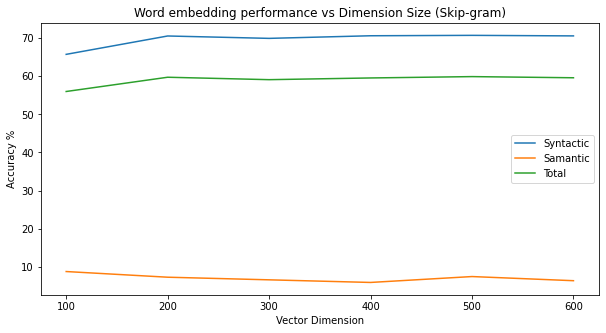

In [ ]:
############skip gram
from matplotlib import pyplot as plt
vector_dim=[100,200,300,400,500,600]
plt.figure(figsize=(10,5)) 
plt.plot(vector_dim,syn,label='Syntactic')
#plt.legend('syn')
plt.plot(vector_dim,sam,label='Samantic')
#plt.legend('sam')
plt.plot(vector_dim,total,label='Total')
plt.legend()
plt.title('Word embedding performance vs Dimension Size (Skip-gram)')
plt.xlabel('Vector Dimension')
plt.ylabel('Accuracy %')

Text(0, 0.5, 'Accuracy %')

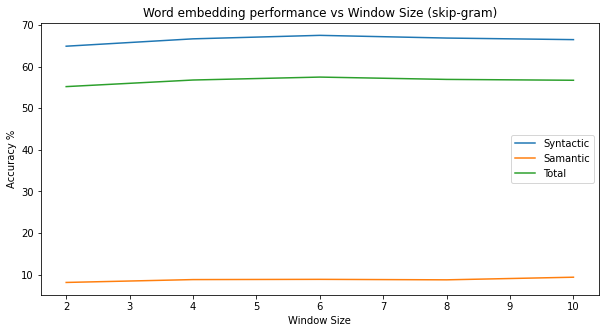

In [ ]:
#####skip gram
win_size=[2,4,6,8,10]
plt.figure(figsize=(10,5)) 
plt.plot(win_size,syn2,label='Syntactic')
#plt.legend('syn')
plt.plot(win_size,sam2,label='Samantic')
#plt.legend('sam')
plt.plot(win_size,total2,label='Total')
plt.legend()
plt.title('Word embedding performance vs Window Size (skip-gram)')
plt.xlabel('Window Size')
plt.ylabel('Accuracy %')


In [16]:
ft_cbow_model1 = FastText(total_data, size=100, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model1.save('fastext100cbow.model')
ft_cbow_model11=FastText.load('fastext100cbow.model')
ft_cbow_model11.wv.save_word2vec_format('ft_cbow_w100.txt', binary=False)
ft_cbow_model2 = FastText(total_data, size=200, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model2.save('fastext200cbow.model')
ft_cbow_model22=FastText.load('fastext200cbow.model')
ft_cbow_model22.wv.save_word2vec_format('ft_cbow_w200.txt', binary=False)
ft_cbow_model3 = FastText(total_data, size=300, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model3.save('fastext300cbow.model')
ft_cbow_model33=FastText.load('fastext300cbow.model')
ft_cbow_model33.wv.save_word2vec_format('ft_cbow_w300.txt', binary=False)
ft_cbow_model4 = FastText(total_data, size=400, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model4.save('fastext400cbow.model')
ft_cbow_model44=FastText.load('fastext400cbow.model')
ft_cbow_model44.wv.save_word2vec_format('ft_cbow_w400.txt', binary=False)
ft_cbow_model5 = FastText(total_data, size=500, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model5.save('fastext500cbow.model')
ft_cbow_model55=FastText.load('fastext500cbow.model')
ft_cbow_model55.wv.save_word2vec_format('ft_cbow_w500.txt', binary=False)
ft_cbow_model6 = FastText(total_data, size=600, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model6.save('fastext600cbow.model')
ft_cbow_model66=FastText.load('fastext600cbow.model')
ft_cbow_model66.wv.save_word2vec_format('ft_cbow_w600.txt', binary=False)


In [19]:
import numpy as np
vectors_files3=["/content/ft_cbow_w100.txt","/content/ft_cbow_w200.txt","/content/ft_cbow_w300.txt","/content/ft_cbow_w400.txt","/content/ft_cbow_w500.txt","/content/ft_cbow_w600.txt"]

syn3 = []
sam3=[]
total3=[]

for x in vectors_files3:
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(getting_vector(x)[0], getting_vector(x)[1], prefix='/content/GloVe/eval/question-data')
    syn3.append(correct_syn / float(count_syn)*100)
    sam3.append(correct_sem / float(count_sem)*100)
    total3.append(correct_tot / float(count_tot)*100)

Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 1.10% (3/272)
capital-world.txt:
ACCURACY TOP1: 0.89% (5/562)
currency.txt:
ACCURACY TOP1: 3.57% (1/28)
city-in-state.txt:
ACCURACY TOP1: 0.00% (0/545)
family.txt:
ACCURACY TOP1: 15.79% (54/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 69.21% (562/812)
gram2-opposite.txt:
ACCURACY TOP1: 83.99% (425/506)
gram3-comparative.txt:
ACCURACY TOP1: 73.80% (983/1332)
gram4-superlative.txt:
ACCURACY TOP1: 85.58% (647/756)
gram5-present-participle.txt:
ACCURACY TOP1: 67.44% (669/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 20.38% (173/849)
gram7-past-tense.txt:
ACCURACY TOP1: 18.96% (281/1482)
gram8-plural.txt:
ACCURACY TOP1: 51.71% (513/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 71.03% (537/756)
Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 0.74% (2/272)
capital-world.txt:
ACCURACY TOP1: 0.53% (3/562)
currency.txt:
ACCURACY TOP1: 3.57% (1/28)
city-in-state.txt:
AC

Text(0, 0.5, 'Accuracy %')

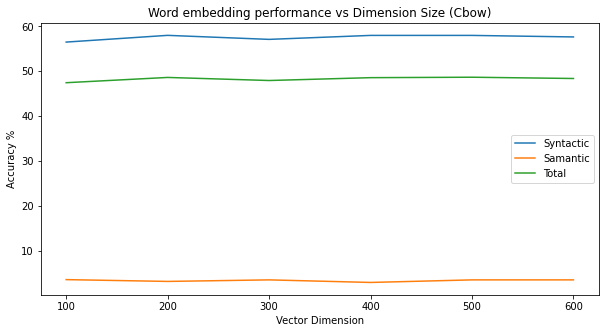

In [20]:
#####cbow
from matplotlib import pyplot as plt
vector_dim=[100,200,300,400,500,600]
plt.figure(figsize=(10,5)) 
plt.plot(vector_dim,syn3,label='Syntactic')
#plt.legend('syn')
plt.plot(vector_dim,sam3,label='Samantic')
#plt.legend('sam')
plt.plot(vector_dim,total3,label='Total')
plt.legend()
plt.title('Word embedding performance vs Dimension Size (Cbow)')
plt.xlabel('Vector Dimension')
plt.ylabel('Accuracy %')

In [21]:
ft_cbow_model_win2 = FastText(total_data, size=100, window=2, min_count=5, workers=3, sg=0)
ft_cbow_model_win2.save('fastext_win2cbow.model')
ft_cbow_model_win22=FastText.load('fastext_win2cbow.model')
ft_cbow_model_win22.wv.save_word2vec_format('ft_cbow_win2.txt', binary=False)

ft_cbow_model_win4 = FastText(total_data, size=100, window=4, min_count=5, workers=3, sg=0)
ft_cbow_model_win4.save('fastext_win4cbow.model')
ft_cbow_model_win44=FastText.load('fastext_win4cbow.model')
ft_cbow_model_win44.wv.save_word2vec_format('ft_cbow_win4.txt', binary=False)

ft_cbow_model_win6 = FastText(total_data, size=100, window=6, min_count=5, workers=3, sg=0)
ft_cbow_model_win6.save('fastext_win6cbow.model')
ft_cbow_model_win66=FastText.load('fastext_win6cbow.model')
ft_cbow_model_win66.wv.save_word2vec_format('ft_cbow_win6.txt', binary=False)

ft_cbow_model_win8 = FastText(total_data, size=100, window=8, min_count=5, workers=3, sg=0)
ft_cbow_model_win8.save('fastext_win8cbow.model')
ft_cbow_model_win88=FastText.load('fastext_win8cbow.model')
ft_cbow_model_win88.wv.save_word2vec_format('ft_cbow_win8.txt', binary=False)

ft_cbow_model_win10 = FastText(total_data, size=100, window=10, min_count=5, workers=3, sg=0)
ft_cbow_model_win10.save('fastext_win10cbow.model')
ft_cbow_model_win1010=FastText.load('fastext_win10cbow.model')
ft_cbow_model_win1010.wv.save_word2vec_format('ft_cbow_win10.txt', binary=False)

In [25]:
vectors_files4=["ft_cbow_win2.txt","ft_cbow_win4.txt","ft_cbow_win6.txt","ft_cbow_win8.txt",'ft_cbow_win10.txt']

syn4 = []
sam4=[]
total4=[]

for x in vectors_files4:
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(getting_vector(x)[0], getting_vector(x)[1], prefix='/content/GloVe/eval/question-data')
    syn4.append(correct_syn / float(count_syn)*100)
    sam4.append(correct_sem / float(count_sem)*100)
    total4.append(correct_tot / float(count_tot)*100)

Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 0.74% (2/272)
capital-world.txt:
ACCURACY TOP1: 1.42% (8/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.18% (1/545)
family.txt:
ACCURACY TOP1: 23.98% (82/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 72.04% (585/812)
gram2-opposite.txt:
ACCURACY TOP1: 86.56% (438/506)
gram3-comparative.txt:
ACCURACY TOP1: 80.41% (1071/1332)
gram4-superlative.txt:
ACCURACY TOP1: 89.29% (675/756)
gram5-present-participle.txt:
ACCURACY TOP1: 67.24% (667/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 19.32% (164/849)
gram7-past-tense.txt:
ACCURACY TOP1: 18.76% (278/1482)
gram8-plural.txt:
ACCURACY TOP1: 52.12% (517/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 71.56% (541/756)
Vocab size:  22193
Vocab size:  22193
capital-common-countries.txt:
ACCURACY TOP1: 1.10% (3/272)
capital-world.txt:
ACCURACY TOP1: 1.07% (6/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
A

Text(0, 0.5, 'Accuracy %')

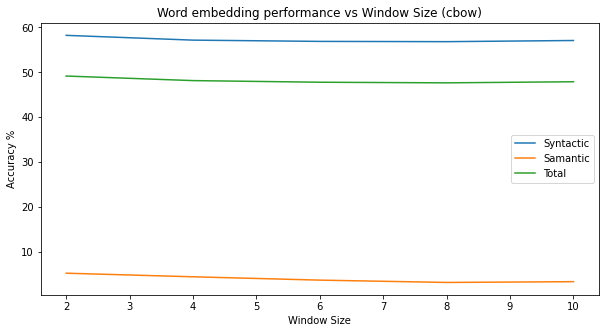

In [26]:
#####cbow
win_size=[2,4,6,8,10]
plt.figure(figsize=(10,5)) 
plt.plot(win_size,syn4,label='Syntactic')
#plt.legend('syn')
plt.plot(win_size,sam4,label='Samantic')
#plt.legend('sam')
plt.plot(win_size,total4,label='Total')
plt.legend()
plt.title('Word embedding performance vs Window Size (cbow)')
plt.xlabel('Window Size')
plt.ylabel('Accuracy %')


## 3.2. Performance Evaluation


You are required to provide the table with precision, recall, f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


The below result is showing the model can achieve a weighted averge F1 socre of 0.67. The F1 score is calucated as  2* (precision * recall) / (precision + recall). Precision is calculated using number of true positives divided by the number of false positives plus true positives and Recall is calculated using number of true positives divided by the number of true positives plus false negatives. Overall, the model performs slightly better on precision (0.7) than recall (0.68) means there are slightly more true positive cases being classified as negative by our model.

In [ ]:
# Please comment your code
with torch.no_grad():
    model.eval()
    for x,y in my_test_data:
        outputs=model(x)

predicted = torch.argmax(torch.tensor(outputs), -1)
print(len(predicted))

from sklearn.metrics import classification_report,f1_score
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

print(f1_score(label_test_encoded,predicted.cpu().numpy(),average='weighted'))



2000
              precision    recall  f1-score   support

           0       0.64      0.84      0.72      1000
           1       0.76      0.52      0.62      1000

    accuracy                           0.68      2000
   macro avg       0.70      0.68      0.67      2000
weighted avg       0.70      0.68      0.67      2000

0.6704579402697318


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


' '

## 3.3. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.

In below, I have tested model's performance on test data using different learning rate, number of hidden states and number of epochs. As below graphs shows learing rate = 0.01 and number of hidden state = 62 returns the best result. In addition, the performance seem to peak at epoch = 4 and starts to decline after which can be a sign of overfitting when training epoch is bigger than 4.


(*Please show your empirical evidence*)

In [ ]:
####hyper parameter testing:


vocab_size = len(word_list)
n_class = n_class
total_epoch = 8



train_dataset = TensorDataset(torch.tensor(sent_encoded),torch.tensor(label_train_encoded))
test_dataset = TensorDataset(torch.tensor(test_encoded),torch.tensor(label_test_encoded))

my_train_data = DataLoader(train_dataset,batch_size = 100,shuffle=True)
my_test_data = DataLoader(test_dataset,batch_size=2000,shuffle=False)

def training_model(learning_rate,n_hidden):
        model = Bi_LSTM_Emb().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        F1=[]
        epochs=[]
        for epoch in range(8):
            model.train()
            accu = 0
            for z ,(x,y) in enumerate(my_train_data):
                x,y = x.to(device),y.to(device)
                optimizer.zero_grad()
                outputs = model(x)
                loss = criterion(outputs,y)
                loss.backward()
                optimizer.step()
                predicted = torch.argmax(outputs,-1)
                acc = accuracy_score(predicted.cpu().numpy(),y.cpu().numpy())
                accu += acc

                #if (z+1)%40 == 0:
            if epoch==7:      #print('Batch # {} with accuracy of {:.3%} and loss of {:.4f}'.format(z+1,acc,loss))
                print('Epoch {} with loss of {:.5f} and epoch eccuracy of {:.2%}'.format(epoch+1,loss,accu*100/8000))

            with torch.no_grad():
                model.eval()
                for x,y in my_test_data:
                    outputs=model(x)
            predicted = torch.argmax(torch.tensor(outputs), -1)
            F1.append(f1_score(label_test_encoded,predicted.cpu().numpy(),average='weighted'))
            epochs.append(epoch+1)
        return F1[-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 8 with loss of 0.66495 and epoch eccuracy of 73.33%
Epoch 8 with loss of 0.37224 and epoch eccuracy of 80.50%
Epoch 8 with loss of 0.39455 and epoch eccuracy of 85.29%
Epoch 8 with loss of 0.35295 and epoch eccuracy of 84.49%
Epoch 8 with loss of 0.29138 and epoch eccuracy of 82.05%
Epoch 8 with loss of 0.56925 and epoch eccuracy of 75.90%


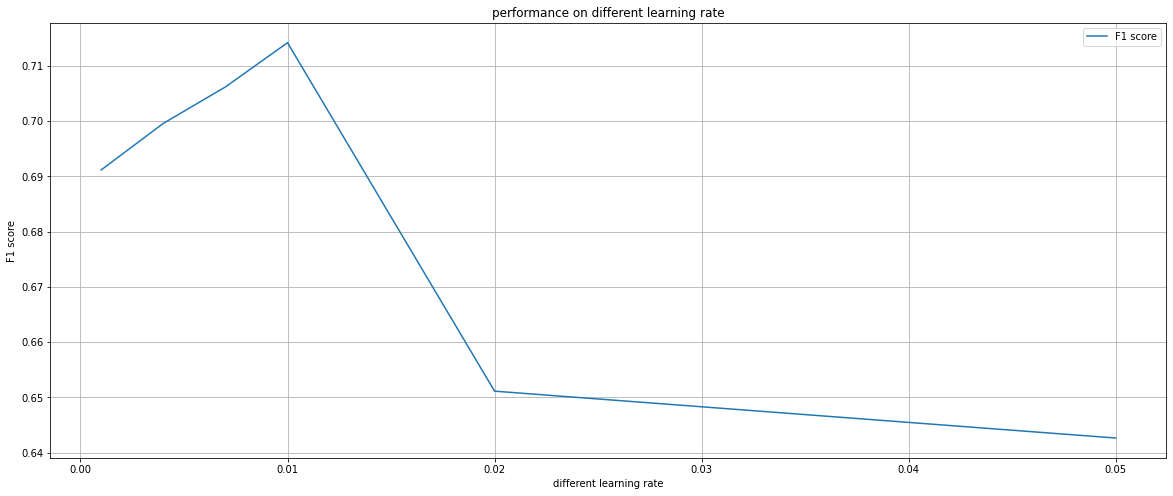

In [ ]:
# To test different learning rate's performance based on F1 socre on test dataset

lr_rate=[0.05,0.02,0.01,0.007,0.004,0.001]
F1_his=[]
for x in lr_rate:
    F1_his.append(training_model(x,50))

from matplotlib import pyplot as plt

plt.figure(figsize=(20,8))        
plt.plot(lr_rate,F1_his,label='F1 score')
plt.xlabel('different learning rate')
plt.ylabel('F1 score')
plt.title('performance on different learning rate')
plt.legend()
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 8 with loss of 0.39486 and epoch eccuracy of 83.38%
Epoch 8 with loss of 0.47620 and epoch eccuracy of 83.77%
Epoch 8 with loss of 0.33162 and epoch eccuracy of 83.85%
Epoch 8 with loss of 0.32599 and epoch eccuracy of 83.86%
Epoch 8 with loss of 0.39697 and epoch eccuracy of 83.87%
Epoch 8 with loss of 0.41136 and epoch eccuracy of 84.50%


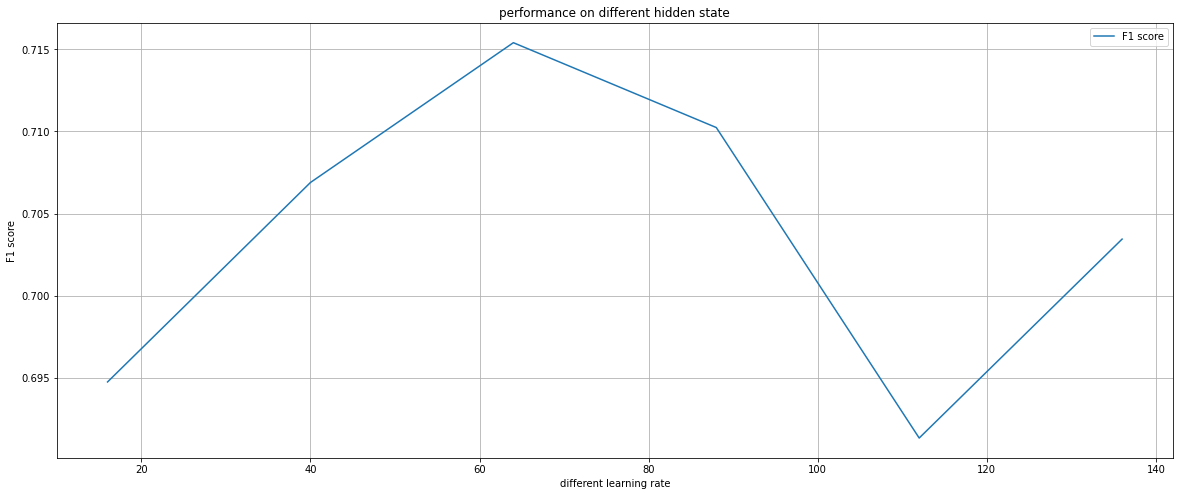

In [ ]:
# To test different hidden state size's performance based on F1 socre on test dataset

hidden_state=[16,40,64,88,112,136]
F1_his2=[]
for x in hidden_state:
    F1_his2.append(training_model(0.01,x))

from matplotlib import pyplot as plt

plt.figure(figsize=(20,8))        
plt.plot(hidden_state,F1_his2,label='F1 score')
plt.xlabel('different learning rate')
plt.ylabel('F1 score')
plt.title('performance on different hidden state')
plt.legend()
plt.grid()

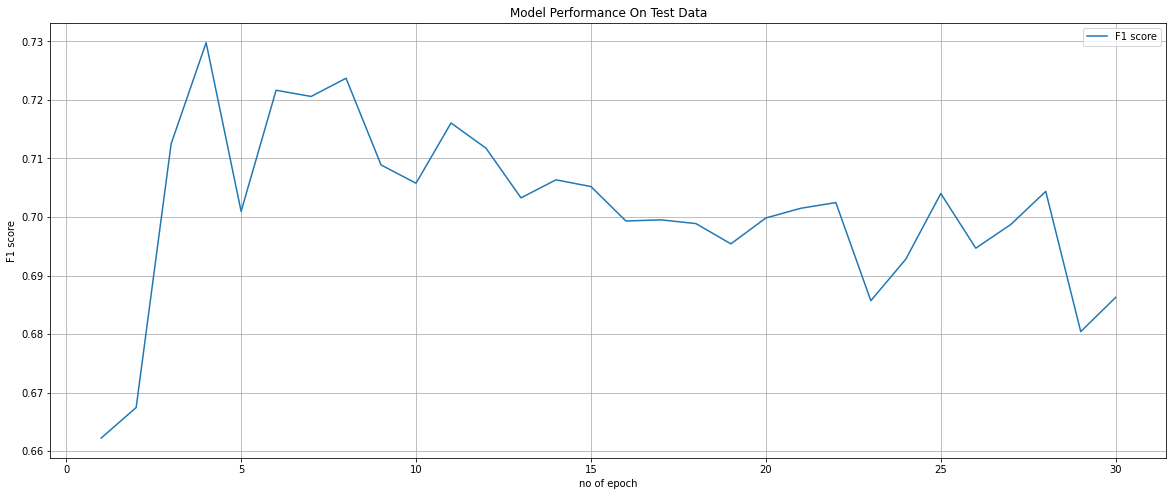

In [ ]:
# Please comment your code
from matplotlib import pyplot as plt

plt.figure(figsize=(20,8))        
plt.plot(epochs_,F1_score,label='F1 score')
plt.xlabel('no of epoch')
plt.ylabel('F1 score')
plt.title('Model Performance On Test Data')
plt.legend()
plt.grid()

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section